In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
x_train[0].shape

(28, 28)

# **Visualizing the Images**

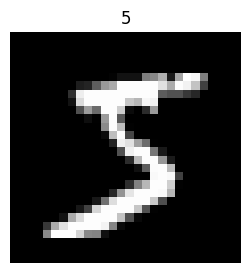

In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(x_train[0], cmap="gray")
plt.title(y_train[0])
plt.axis(False);

# **Building the model**



1. Normalizing Our Data


In [ ]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

2. Building The Neural Network


In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

3. Training And Testing


In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2685 - accuracy: 0.9197
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1130 - accuracy: 0.9657
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0778 - accuracy: 0.9756


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9698
0.09891794621944427
0.9697999954223633


# **Testing the model**

In [ ]:
!git clone --depth 2 --branch master https://github.com/NeuralNine/handwritten-digits-recognition.git digits

Cloning into 'digits'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 2), reused 28 (delta 2), pack-reused 0
Receiving objects: 100% (28/28), 1.20 MiB | 1.51 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
import os
import cv2

1/1 [==============================] - 0s 106ms/step
The number is probably a 7
1/1 [==============================] - 0s 20ms/step
The number is probably a 2
1/1 [==============================] - 0s 20ms/step
The number is probably a 9
1/1 [==============================] - 0s 24ms/step
The number is probably a 8
1/1 [==============================] - 0s 24ms/step
The number is probably a 5
1/1 [==============================] - 0s 35ms/step
The number is probably a 6
1/1 [==============================] - 0s 24ms/step
The number is probably a 1
1/1 [==============================] - 0s 21ms/step
The number is probably a 5
1/1 [==============================] - 0s 23ms/step
The number is probably a 7
1/1 [==============================] - 0s 20ms/step
The number is probably a 7
1/1 [==============================] - 0s 31ms/step
The number is probably a 0
1/1 [==============================] - 0s 24ms/step
The number is probably a 0
1/1 [==============================] - 0s 23ms/step

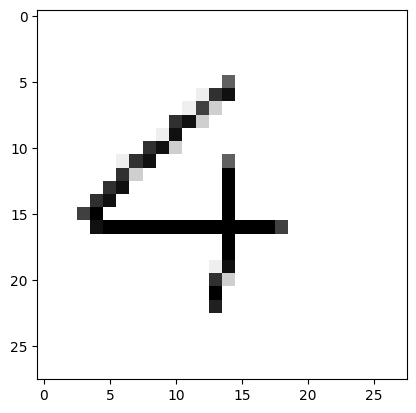

In [ ]:
image_index = 1
while os.path.isfile('digit{}.png'.format(image_index)):
  try:
    img = cv2.imread('digit{}.png'.format(image_index))[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print('The number is probably a {}'.format(np.argmax(prediction)))
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show
  except:
    print('Error reading image! Proceeding to the next one...')
  finally:
    image_index += 1